In [1]:
from gscore.fdr import GlobalDistribution

In [41]:
model_path = "/home/aaron/projects/ghost/data/spike_in/models/peptide.test"

In [42]:
global_model = GlobalDistribution.load(model_path)

In [43]:
import pandas as pd

check = pd.DataFrame(
    {
        "label": global_model.labels.ravel(),
        "scores": global_model.scores.ravel()
    }
)

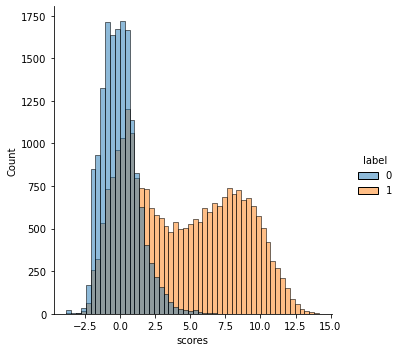

In [44]:
import seaborn as sns

sns.displot(check, x="scores", hue="label")

In [45]:
function_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.target_scores.ravel(),
        "type": ["Target" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

In [46]:
function_check

,label,scores,type
0,-2.000000,1.237805e-09,Target
1,-1.995996,1.384078e-09,Target
2,-1.991992,1.547160e-09,Target
3,-1.987988,1.728925e-09,Target
4,-1.983984,1.931448e-09,Target
...,...,...,...
995,1.983984,4.113670e-09,Target
996,1.987988,3.700641e-09,Target
997,1.991992,3.327886e-09,Target
998,1.995996,2.991602e-09,Target


In [47]:
decoy_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.decoy_scores.ravel(),
        "type": ["Decoy" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

all_scores = pd.concat(
    [
        function_check,
        decoy_check
    ]
).reset_index()

<AxesSubplot:xlabel='label', ylabel='scores'>

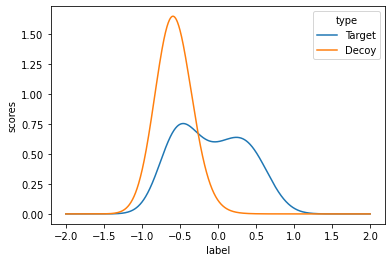

In [48]:
sns.lineplot(data=all_scores, x="label", y="scores", hue="type")

In [37]:
decoy_check

,label,scores,type
0,-3.857257,1.633322e-48,Decoy
1,-3.839204,5.967475e-48,Decoy
2,-3.821151,2.162713e-47,Decoy
3,-3.803098,7.774937e-47,Decoy
4,-3.785045,2.772582e-46,Decoy
...,...,...,...
995,14.105648,0.000000e+00,Decoy
996,14.123701,0.000000e+00,Decoy
997,14.141754,0.000000e+00,Decoy
998,14.159807,0.000000e+00,Decoy
